In [152]:
from matplotlib import pyplot as plt
import numpy as np
import random
import time
from IPython.display import clear_output

In [ ]:

clear_output(True)
#plt.clf()
#plt.setp(plt.gca(), autoscale_on=False)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()


In [ ]:
nrows, ncols = 4,4
image = np.zeros(nrows*ncols)
image[::2] = (nrows)
image = image.reshape((nrows,ncols))
row_labels = range(nrows)
col_labels = ["A", "B", "C", "D"]
print(image)
plt.matshow(image)
plt.yticks(range(nrows),row_labels)
plt.xticks(range(ncols),col_labels)
plt.show()

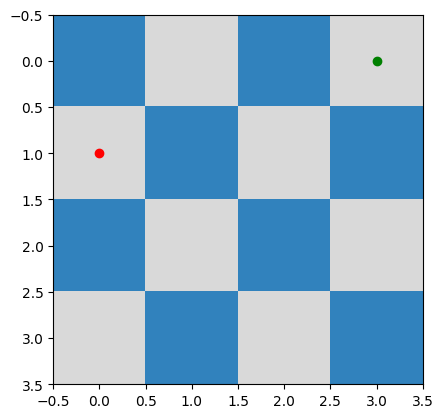

In [199]:
x = range(4)
y = range(4)
h,v = np.meshgrid(x,y)  #rect grid with vector coordinates (X,Y)
#min_max = np.min(x), np.max(x), np.min(y), np.max(y) 
res = np.add.outer(range(4), range(4))%2  # returns product of two vectors
plt.imshow(res, cmap="tab20c")
plt.xticks(minor=False)
plt.yticks(minor=False)
positions=np.vstack([h.ravel(), v.ravel()]).T
start_position = random.choice(positions)
target_position = random.choice(positions)
start = plt.scatter(start_position[0],start_position[1],color="r")
target = plt.scatter(target_position[0],target_position[1],color="g")
plt.show()




